(9993, 6, 6)
(9993,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 4)                 120       
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 125 (500.00 Byte)
Trainable params: 125 (500.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
313/313 [==============================] - 17s 15ms/step - loss: 0.0275
Epoch 2/10
313/313 [==============================] - 3s 10ms/step - loss: 0.0128
Epoch 3/10
313/313 [==============================] - 2s 8ms/step - loss: 0.0130
Epoch 4/10
313/313 [==============================] - 2s 7ms/step - loss: 0.0127


<ipython-input-1-5d1cbd84be1d>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  XX[i+off] = y


1/1 [==============================] - 0s 26ms/step


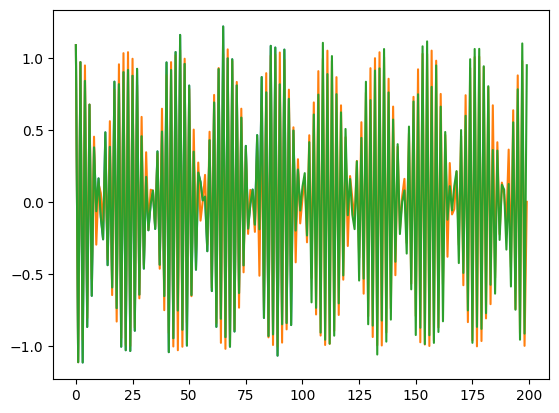

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, GRU, Input, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

N = 10000
data = np.array([np.cos(3*x) for x in range(N)]) + 0.1*np.random.randn(N)
plt.plot(data[:100])

off = 3
length = off*2+1
X = np.array([np.diag(np.hstack((data[i:i+off], data[i+off+1:i+length]))) for i in range(N-length)])
Y = data[off:N-off-1]
print(X.shape, Y.shape, sep='\n')

model = Sequential()
model.add(Input((length-1, length-1)))
model.add(Bidirectional(GRU(2)))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(loss='mean_squared_error', optimizer=Adam(0.01))

history = model.fit(X, Y, batch_size=32, epochs=10)

M = 200
XX = np.zeros(M)
XX[:off] = data[:off]
for i in range(M-off-1):
    x = np.diag(np.hstack((XX[i:i+off], data[i+off+1:i+length])))
    x = np.expand_dims(x, axis=0)
    y = model.predict(x)
    XX[i+off] = y

plt.plot(XX[:M])
plt.plot(data[:M])
